In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Auto MPG Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(url, delim_whitespace=True, names=column_names)

#Relationship of vehicle weight and vehicle mpg
df = df[['weight', 'mpg']].dropna()

df.head()

,weight,mpg
0,3504.0,18.0
1,3693.0,15.0
2,3436.0,18.0
3,3433.0,16.0
4,3449.0,17.0


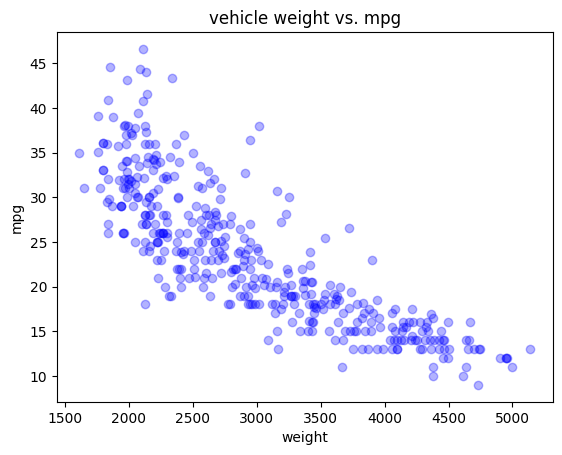

In [19]:
plt.scatter(df.weight, df.mpg, color='b', alpha=0.3)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('vehicle weight vs. mpg')
plt.show()

In [4]:
#Features matrix (vehicle weight), target column (vehicle mpg)
X = df['weight'].values
y = df['mpg'].values

#standard scaling features
X = X/X.mean() 

In [13]:
#Gradient Descent

lr = 0.2
n = len(y) #number of examples
iterations = 200

#starting weights. arbitrary. not imperative.
w = 0
b = y.mean()

#RMSE Loss Fx
def loss(w, b):
    return np.sum( (y - (w*X + b))**2 ) / n # RMSE

for i in range(iterations+1):
    # calculate gradients aka 1st derivatives for each weight
    dw = -2 * np.sum( X * (y - (w*X + b)) ) / n   #derivative of loss fx with respect to w
    db = -2 * np.sum( (y - (w*X + b)) ) / n       #derivative of loss fx with respect to b

    #update weights. opposite of gradient direction.
    w = w - lr*dw 
    b = b - lr*db
    
    if i%50 == 0:
        print('Iteration: ', i,' | ','RMSE Loss: ', loss(w,b))

    #irrelevant. storing for later plotting.
    if iterations//2 == i:
        mid_w = w
        mid_b = b
    

Iteration:  0  |  RMSE Loss:  58.79316436427811
Iteration:  50  |  RMSE Loss:  26.842394108874082
Iteration:  100  |  RMSE Loss:  20.406310351021478
Iteration:  150  |  RMSE Loss:  19.108651028148085
Iteration:  200  |  RMSE Loss:  18.847013706199675


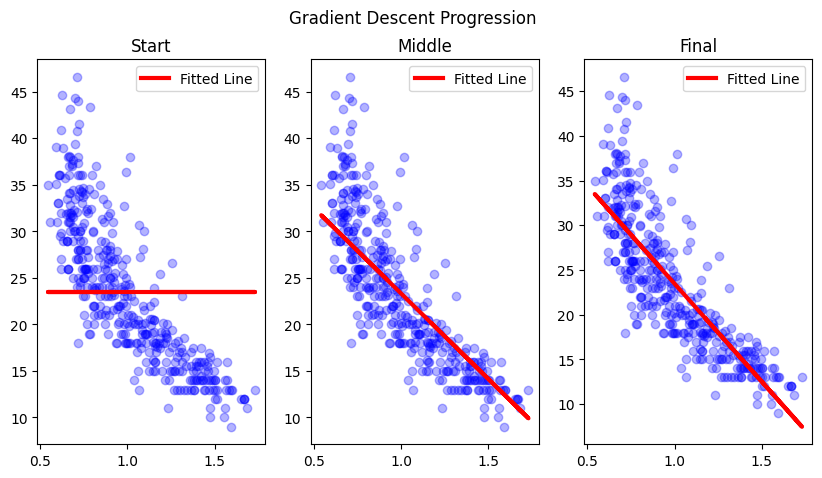

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

fig.suptitle('Gradient Descent Progression')

ax1.scatter(X, y, color='b', alpha = 0.3)
ax1.plot(X, [y.mean()]*y.shape[0], color='r', linewidth=3, label='Fitted Line')
ax1.legend()
ax1.set_title('Start');

ax2.scatter(X, y, color='b', alpha = 0.3)
ax2.plot(X, mid_w*X+mid_b, color='r', linewidth=3, label='Fitted Line')
ax2.legend()
ax2.set_title('Middle');

ax3.scatter(X, y, color='b', alpha = 0.3)
ax3.plot(X, w*X+b, color='r', linewidth=3, label='Fitted Line')
ax3.legend()
ax3.set_title('Final');